# MÁSTER EN BIG DATA Y DATA SCIENCE
## TRABAJO DE FIN DE GRADO
### 1. DATA UNDERSTANDING AND DATA PREPARATION

Maria Reig Pérez | 17 de febrero de 2024

#### LIBRARIES

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

#### PATHS

In [23]:
df_train_path = r"UNSW_NB15_training-set.csv"
df_test_path = r"UNSW_NB15_testing-set.csv"

#### DATA IMPORT

In [24]:
df_train = pd.read_csv(df_train_path)
df_test = pd.read_csv(df_test_path)

In [25]:
df = pd.concat([df_train, df_test])
df = df.reset_index(drop=True)

In [26]:
df.shape

(257673, 45)

In [27]:
df.drop_duplicates().shape

(257673, 45)

In [28]:
col_order =["proto"] + ['state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
'dloss', 'service', 'sload','dload', 'spkts', 'dpkts'] + ['swin', 'dwin', 'stcpb',  
'dtcpb', 'smean', 'dmean', 'trans_depth','response_body_len'] + [ 'sjit', 'djit', 'rate', 
'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat'] + ['is_sm_ips_ports', 'ct_state_ttl', 
'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm'] + ['label', 'attack_cat']

df = df[col_order]
df_train = df_train[col_order]
df_test = df_test[col_order]

In [29]:
df

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label,attack_cat
0,tcp,FIN,0.121478,258,172,252,254,0,0,-,...,0,1,1,1,1,1,1,1,0,Normal
1,tcp,FIN,0.649902,734,42014,62,252,2,17,-,...,0,43,6,1,1,1,1,2,0,Normal
2,tcp,FIN,1.623129,364,13186,62,252,1,6,-,...,0,7,6,2,2,1,1,3,0,Normal
3,tcp,FIN,1.681642,628,770,62,252,1,3,ftp,...,1,1,1,2,2,1,1,3,0,Normal
4,tcp,FIN,0.449454,534,268,254,252,2,1,-,...,0,43,39,2,2,2,1,40,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,udp,INT,0.000005,104,0,254,0,0,0,-,...,0,1,1,2,2,1,1,2,0,Normal
257669,tcp,FIN,1.106101,18062,354,254,252,7,1,-,...,0,1,2,2,3,1,1,1,0,Normal
257670,arp,INT,0.000000,46,0,0,0,0,0,-,...,0,1,1,1,1,1,1,1,0,Normal
257671,arp,INT,0.000000,46,0,0,0,0,0,-,...,0,1,1,1,1,1,1,1,0,Normal


#### EXPLORATORY DATA ANALYSIS

In [30]:
df.shape, df_train.shape, df_test.shape

((257673, 44), (175341, 44), (82332, 44))

In [31]:
df.drop_duplicates().shape

(162745, 44)

In [32]:
df.dtypes

proto                 object
state                 object
dur                  float64
sbytes                 int64
dbytes                 int64
sttl                   int64
dttl                   int64
sloss                  int64
dloss                  int64
service               object
sload                float64
dload                float64
spkts                  int64
dpkts                  int64
swin                   int64
dwin                   int64
stcpb                  int64
dtcpb                  int64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
sjit                 float64
djit                 float64
rate                 float64
sinpkt               float64
dinpkt               float64
tcprtt               float64
synack               float64
ackdat               float64
is_sm_ips_ports        int64
ct_state_ttl           int64
ct_flw_http_mthd       int64
is_ftp_login           int64
ct_ftp_cmd    

In [33]:
for col in df:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

proto - 0%
state - 0%
dur - 0%
sbytes - 0%
dbytes - 0%
sttl - 0%
dttl - 0%
sloss - 0%
dloss - 0%
service - 0%
sload - 0%
dload - 0%
spkts - 0%
dpkts - 0%
swin - 0%
dwin - 0%
stcpb - 0%
dtcpb - 0%
smean - 0%
dmean - 0%
trans_depth - 0%
response_body_len - 0%
sjit - 0%
djit - 0%
rate - 0%
sinpkt - 0%
dinpkt - 0%
tcprtt - 0%
synack - 0%
ackdat - 0%
is_sm_ips_ports - 0%
ct_state_ttl - 0%
ct_flw_http_mthd - 0%
is_ftp_login - 0%
ct_ftp_cmd - 0%
ct_srv_src - 0%
ct_srv_dst - 0%
ct_dst_ltm - 0%
ct_src_ltm - 0%
ct_src_dport_ltm - 0%
ct_dst_sport_ltm - 0%
ct_dst_src_ltm - 0%
label - 0%
attack_cat - 0%


In [34]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print("\n")

proto
proto
tcp       123041
udp        92701
unas       15599
arp         3846
ospf        3271
           ...  
rdp          131
netblt       131
igmp          48
icmp          15
rtp            1
Name: count, Length: 133, dtype: int64


state
state
FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
PAR         1
URN         1
no          1
CLO         1
Name: count, dtype: int64


dur
dur
0.000009    28577
0.000003    15862
0.000008    15572
0.000005     9356
0.000004     8362
            ...  
0.938986        1
7.309239        1
0.199054        1
0.268811        1
1.106101        1
Name: count, Length: 109945, dtype: int64


sbytes
sbytes
114       57279
200       30671
146        7129
168        4871
564        4814
          ...  
11018         1
59372         1
9191          1
174152        1
138067        1
Name: count, Length: 9382, dtype: int64


dbytes
dbytes
0         120288
268        18653
354        15362
178         7126
10

In [35]:
df.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,8.572952e+03,1.438729e+04,180.000931,84.754957,4.889317,6.743691,7.060869e+07,6.582143e+05,19.777144,...,0.012819,0.012850,9.383176,9.121049,6.050467,6.800045,5.238271,4.032677,8.322964,0.639077
std,5.974305,1.737739e+05,1.461993e+05,102.488268,112.762131,65.574953,53.702222,1.857313e+08,2.412372e+06,135.947152,...,0.116091,0.116421,10.829706,10.874752,8.173749,8.396266,8.160822,5.831515,11.120754,0.480269
min,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000008,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.231800e+04,0.000000e+00,2.000000,...,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,0.004285,5.280000e+02,1.780000e+02,254.000000,29.000000,0.000000,0.000000,7.439423e+05,1.747441e+03,4.000000,...,0.000000,0.000000,5.000000,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000
75%,0.685777,1.362000e+03,1.064000e+03,254.000000,252.000000,3.000000,2.000000,8.000000e+07,2.210538e+04,12.000000,...,0.000000,0.000000,12.000000,11.000000,6.000000,8.000000,4.000000,3.000000,8.000000,1.000000
max,59.999989,1.435577e+07,1.465753e+07,255.000000,254.000000,5319.000000,5507.000000,5.988000e+09,2.242273e+07,10646.000000,...,4.000000,4.000000,63.000000,62.000000,59.000000,60.000000,59.000000,46.000000,65.000000,1.000000


In [36]:
df["attack_cat"].value_counts()

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [37]:
df_train["attack_cat"].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [38]:
df_test["attack_cat"].value_counts()

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

#### DATA PREPROCESSING

In [43]:
target_encoder_proto = ce.TargetEncoder()
df_train['proto_encoded'] = target_encoder_proto.fit_transform(df_train["proto"], df_train["label"])
df_test['proto_encoded'] = target_encoder_proto.transform(df_test["proto"])

target_encoder_state = ce.TargetEncoder()
df_train['state_encoded'] = target_encoder_state.fit_transform(df_train["state"], df_train["label"])
df_test['state_encoded'] = target_encoder_state.transform(df_test["state"])

target_encoder_service = ce.TargetEncoder()
df_train['service_encoded'] = target_encoder_service.fit_transform(df_train["service"], df_train["label"])
df_test['service_encoded'] = target_encoder_service.transform(df_test["service"])

In [45]:
col_order =["proto_encoded"] + ['state_encoded', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
'dloss', 'service_encoded', 'sload','dload', 'spkts', 'dpkts'] + ['swin', 'dwin', 'stcpb',  
'dtcpb', 'smean', 'dmean', 'trans_depth','response_body_len'] + [ 'sjit', 'djit', 'rate', 
'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat'] + ['is_sm_ips_ports', 'ct_state_ttl', 
'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm'] + ['attack_cat']

df_train = df_train[col_order]
df_test = df_test[col_order]

In [46]:
numerical_columns = df.drop(columns=['attack_cat'])
numerical_columns_train = df_train.drop(columns=['attack_cat'])
numerical_columns_test = df_test.drop(columns=['attack_cat'])

scaler = RobustScaler()
normalized_data_train = scaler.fit_transform(numerical_columns_train)
normalized_data_test = scaler.transform(numerical_columns_test)

df_normalized_train = pd.DataFrame(normalized_data_train, columns=numerical_columns_train.columns)
df_normalized_test = pd.DataFrame(normalized_data_test, columns=numerical_columns_test.columns)

df_normalized_train['attack_cat'] = df_train['attack_cat']
df_normalized_test['attack_cat'] = df_test['attack_cat']

In [47]:
df_normalized_train

,proto_encoded,state_encoded,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service_encoded,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,-1.0,0.0,0.179469,-0.131902,0.007260,-0.010417,0.892857,0.000000,0.0,0.000000,...,0.0,0.0,-0.4,-0.3,-0.166667,-0.285714,0.00,0.0,-0.181818,Normal
1,-1.0,0.0,0.970450,0.233129,37.976407,-1.000000,0.884921,0.666667,8.5,0.000000,...,0.0,0.0,3.8,0.2,-0.166667,-0.285714,0.00,0.0,-0.090909,Normal
2,-1.0,0.0,2.427244,-0.050613,11.816697,-1.000000,0.884921,0.333333,3.0,0.000000,...,0.0,0.0,0.2,0.2,0.000000,-0.142857,0.00,0.0,0.000000,Normal
3,-1.0,0.0,2.514830,0.151840,0.549909,-1.000000,0.884921,0.333333,1.5,0.141403,...,1.0,1.0,-0.4,-0.3,0.000000,-0.142857,0.00,0.0,0.000000,Normal
4,-1.0,0.0,0.670406,0.079755,0.094374,0.000000,0.884921,0.666667,0.5,0.000000,...,0.0,0.0,3.8,3.5,0.000000,-0.142857,0.25,0.0,3.363636,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.0,1.0,-0.002355,-0.242331,-0.148820,0.000000,-0.115079,0.000000,0.0,1.000000,...,0.0,0.0,1.9,2.0,3.666667,3.000000,5.75,6.0,1.909091,Generic
175337,-1.0,0.0,0.754692,0.145706,0.172414,0.000000,0.884921,0.666667,0.5,0.000000,...,0.0,0.0,-0.4,-0.3,-0.166667,-0.285714,0.00,0.0,-0.090909,Shellcode
175338,0.0,1.0,-0.002355,-0.242331,-0.148820,0.000000,-0.115079,0.000000,0.0,1.000000,...,0.0,0.0,0.7,0.8,0.166667,0.000000,0.50,1.0,0.909091,Generic
175339,0.0,1.0,-0.002355,-0.242331,-0.148820,0.000000,-0.115079,0.000000,0.0,1.000000,...,0.0,0.0,2.5,2.6,4.666667,3.857143,7.25,6.5,2.454545,Generic


In [48]:
cols_to_select = ["dbytes", "dpkts", "rate", "dloss", "sinpkt", 'ct_state_ttl', 'ct_src_dport_ltm',
"ct_dst_sport_ltm", 'ct_dst_src_ltm', 'is_ftp_login', 'ct_srv_dst', 'is_sm_ips_ports',
"sttl", "dttl", "dload", "sloss", "dinpkt", "proto_encoded", "service_encoded"]
df_normalized_select = df_normalized_train[cols_to_select]

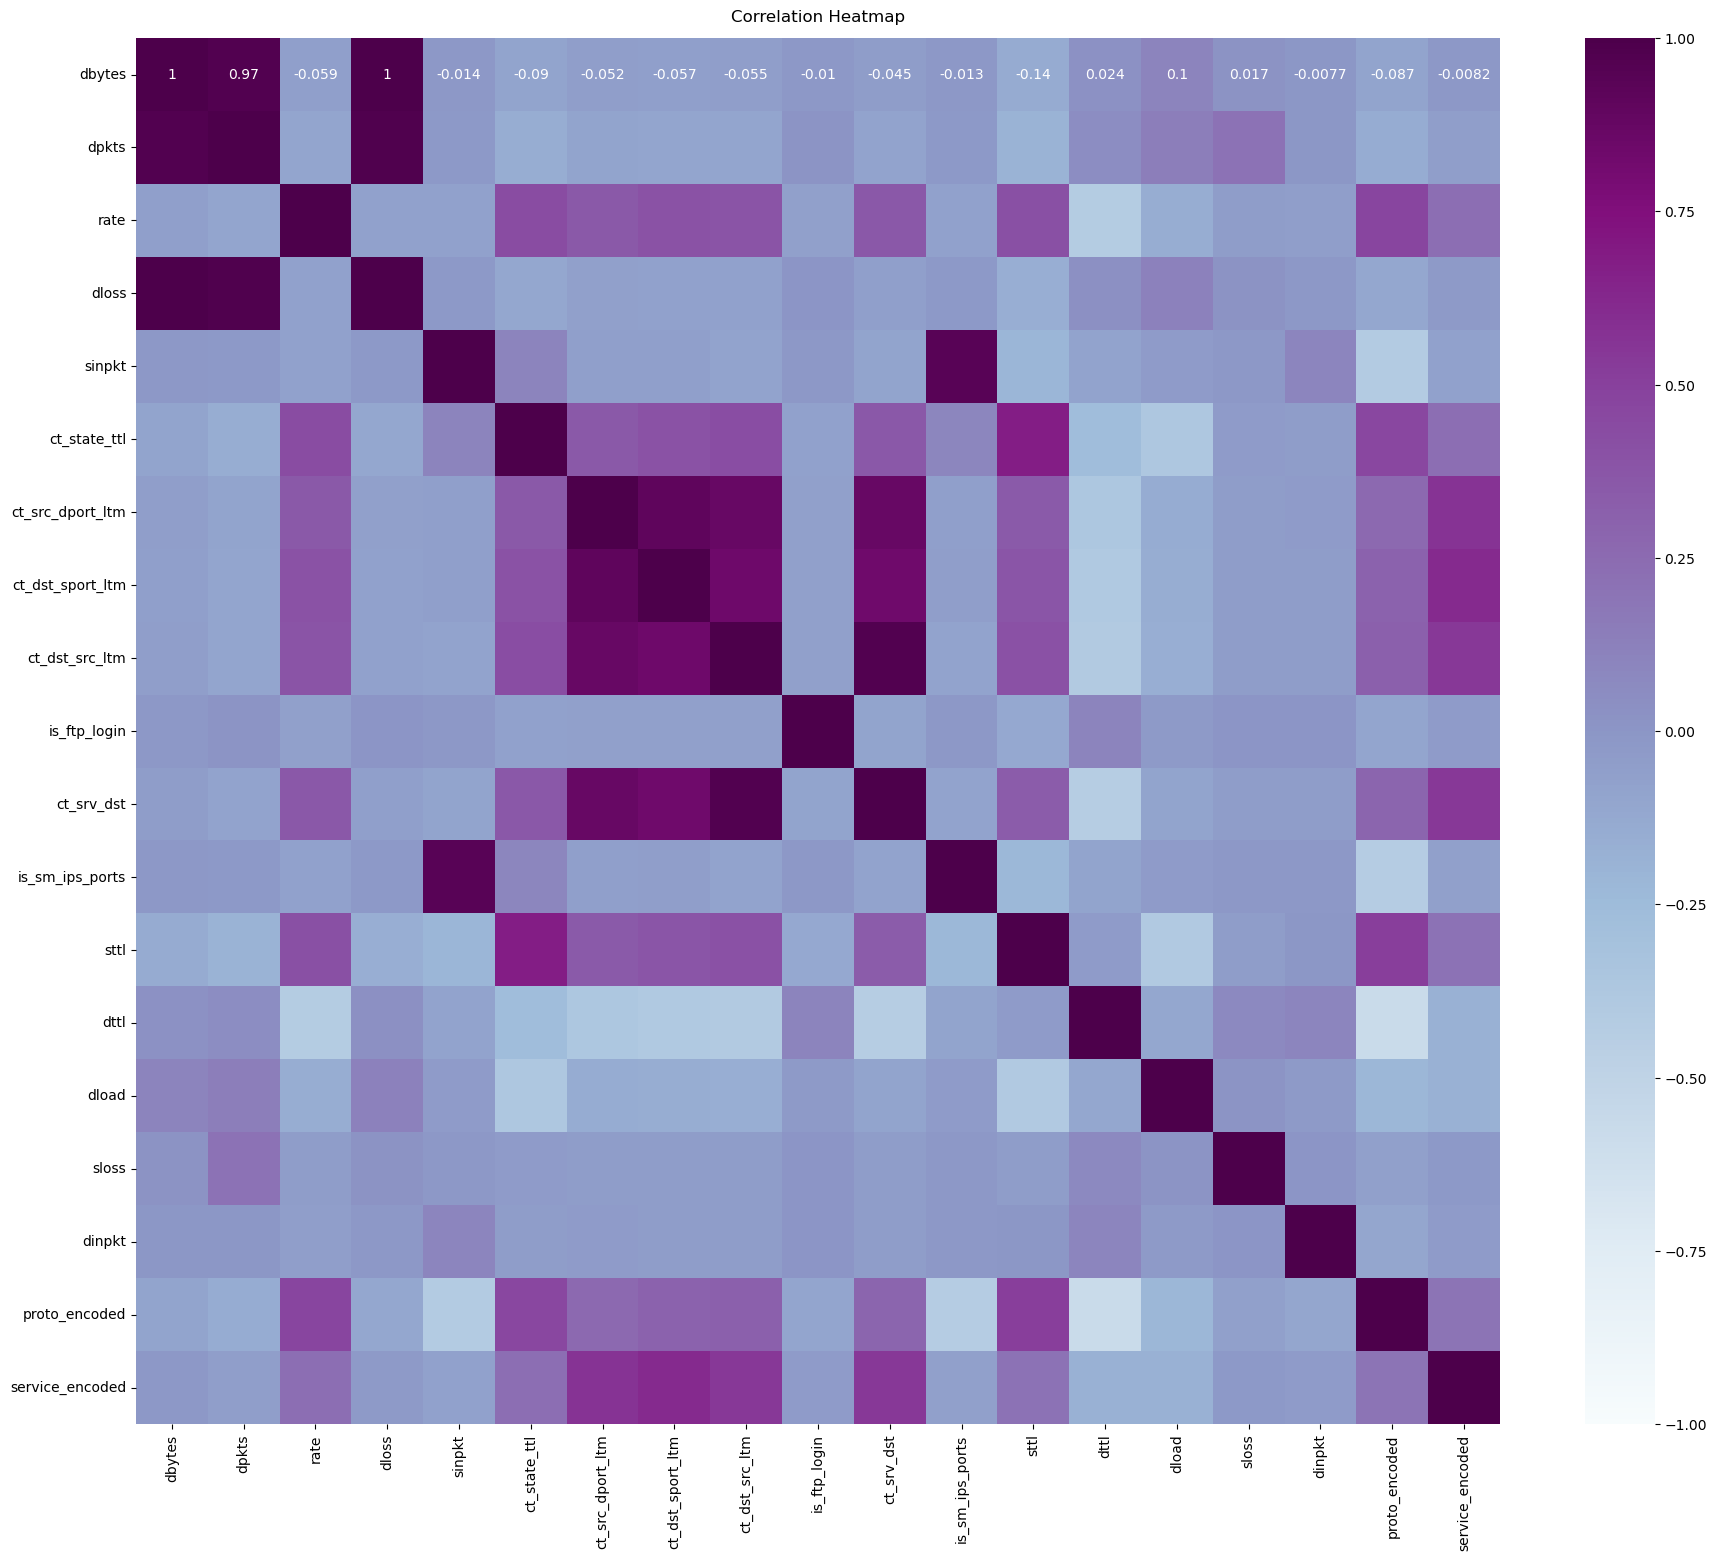

In [49]:
plt.figure(figsize=(22, 18))
heatmap = sns.heatmap(df_normalized_select.corr(), vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [50]:
cols_to_select = ["dttl", "sload", "ct_dst_ltm", "ct_dst_src_ltm", "service_encoded", "state_encoded"]
df_normalized_select = df_normalized_train[cols_to_select]

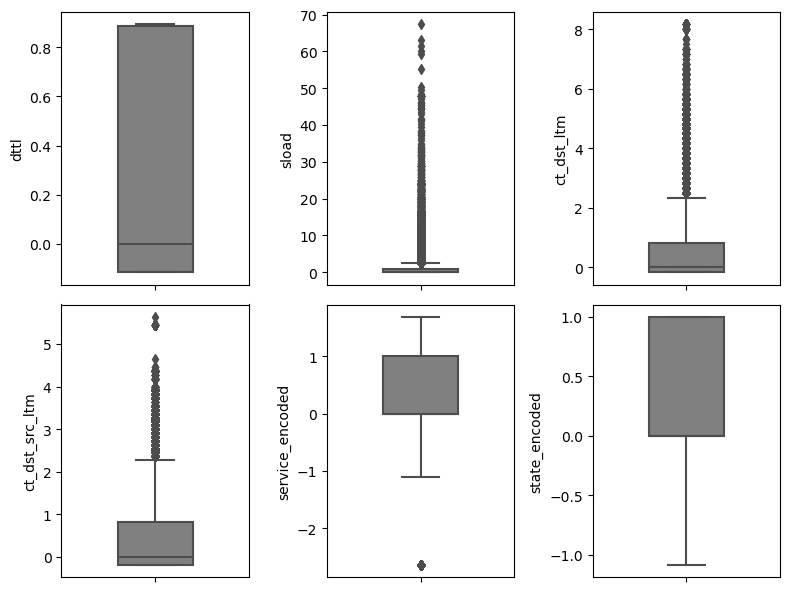

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(df_normalized_select.columns):
    sns.boxplot(y=df_normalized_select[col], ax=axes[i], color='gray', width=0.4)

plt.tight_layout()
plt.show()

#### SETS OF FEATURES

In [52]:
set_1 = ['proto_encoded', 'state_encoded', 'dur', 'sbytes', 'dbytes', 'sttl',
       'dttl', 'sloss', 'dloss', 'service_encoded', 'sload', 'dload', 'spkts',
       'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean',
       'trans_depth', 'response_body_len', 'sjit', 'djit', 'rate', 'sinpkt',
       'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm'] + ['attack_cat']

set_2 = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 
         'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 
         'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'ct_srv_src', 
         'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst'] + ['attack_cat']

set_3 = ['dur', 'proto_encoded', 'service_encoded', 'state_encoded', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl','dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt','dinpkt', 'sjit', 'djit',  'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt'] + ['attack_cat']


In [53]:
df_normalized_train_ = df_normalized_train[set_1]
df_normalized_test_ = df_normalized_test[set_1]
df_normalized_train_.to_csv("train_1.csv")
df_normalized_test_.to_csv("test_1.csv")

In [118]:
df_normalized_train_ = df_normalized_train[set_2]
df_normalized_test_ = df_normalized_test[set_2]
df_normalized_train_.to_csv("train_2.csv")
df_normalized_test_.to_csv("test_2.csv")

In [119]:
df_normalized_train_ = df_normalized_train[set_3]
df_normalized_test_ = df_normalized_test[set_3]
df_normalized_train_.to_csv("train_3.csv")
df_normalized_test_.to_csv("test_3.csv")